<a href="https://colab.research.google.com/github/judemathew777/SPARKS-FOUNDATION/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNSUPERVISED ML**    BY JUDE MATHEW


Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [ ]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='dark', context='talk', palette = 'BuPu_r') 
from sklearn import datasets

In [ ]:
#Load the data
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
print('Data is loaded')

Data is loaded


 **DISPLAY DATA**

In [ ]:
#Display the first 20 rows
iris_data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


**DESCRIBES THE DATA**

In [ ]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = iris_data.iloc[:, [0, 1, 2,3]].values

In [ ]:
y = iris_data['Type']
y = np.array(y)

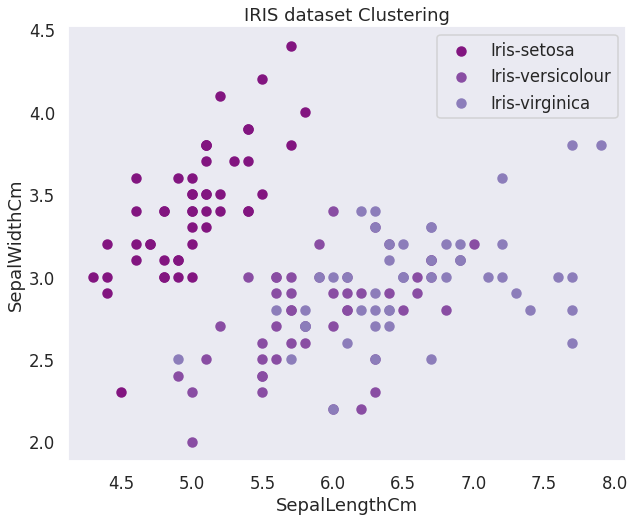

In [ ]:
#IRIS dataset clustering plot
'''In this IRIS dataset, we have three classes. We visualise these classes in a 2-D graph.'''
fig,ax=plt.subplots(figsize=(10, 8))

plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 80, label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 80, label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 80, label = 'Iris-virginica')
plt.title('IRIS dataset Clustering')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()
plt.show()

**ELBOW PLOT**

In [ ]:
from sklearn.cluster import KMeans
'''Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids,
called Within-Cluster-Sum-of-Squares (WCSS)'''
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

**Plotting the results onto a line graph**



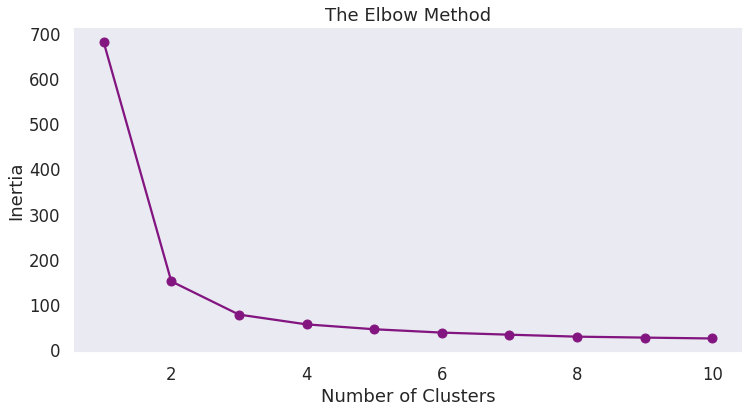

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

From the above diagram we can refer why it is called elbow method.At this point the within cluster sum of squares(inertia) doesn't decrease significantly with every iteration.

As you can see, the optimal value of k is between 2 & 4, as the elbow-like shape is formed at k=3 in the above graph we will implement k-means using k=3.

In [ ]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

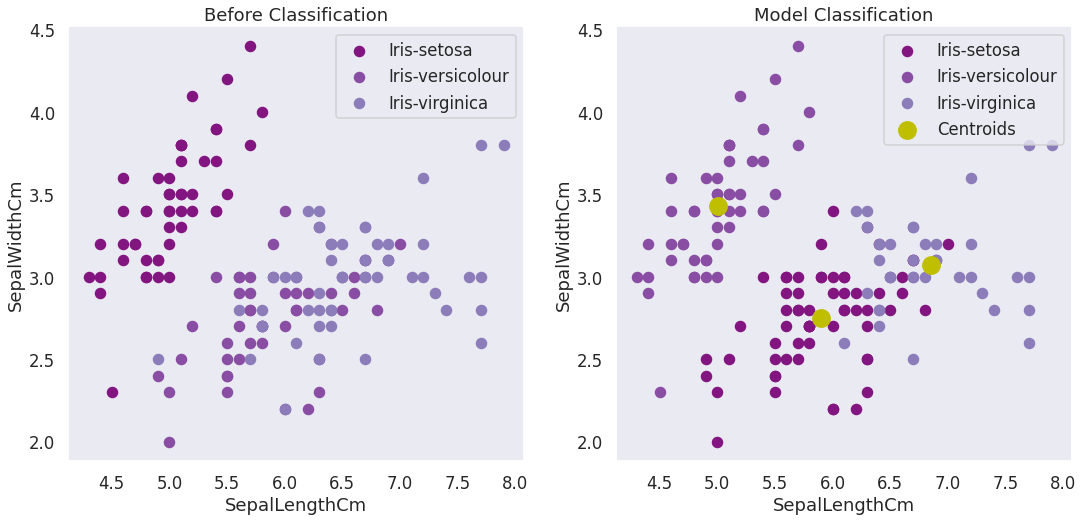

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18, 8))

ax[0].scatter(X[y == 0, 0], X[y == 0, 1], s = 100, label = 'Iris-setosa')
ax[0].scatter(X[y == 1, 0], X[y == 1, 1], s = 100, label = 'Iris-versicolour')
ax[0].scatter(X[y == 2, 0], X[y == 2, 1], s = 100, label = 'Iris-virginica')
ax[0].set(title='Before Classification')
ax[0].set_xlabel("SepalLengthCm")
ax[0].set_ylabel("SepalWidthCm")
ax[0].legend()
# Visualising clusters after fitting the model
ax[1].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, label = 'Iris-setosa')
ax[1].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, label = 'Iris-versicolour')
ax[1].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300,c = 'y',label = 'Centroids')
ax[1].set_xlabel("SepalLengthCm")
ax[1].set_ylabel("SepalWidthCm")
ax[1].set(title='Model Classification')
ax[1].legend()

plt.show()

In the above graphs, we can clearly see that the red dots which represents Iris-setosa are grouped properly. Whereas, the green and blue dots representing Iris-versicolor & Iris-virginica respectively are not clearly separable. Which concludes that the Sepal Features does not differentiate the species in an optimum way.

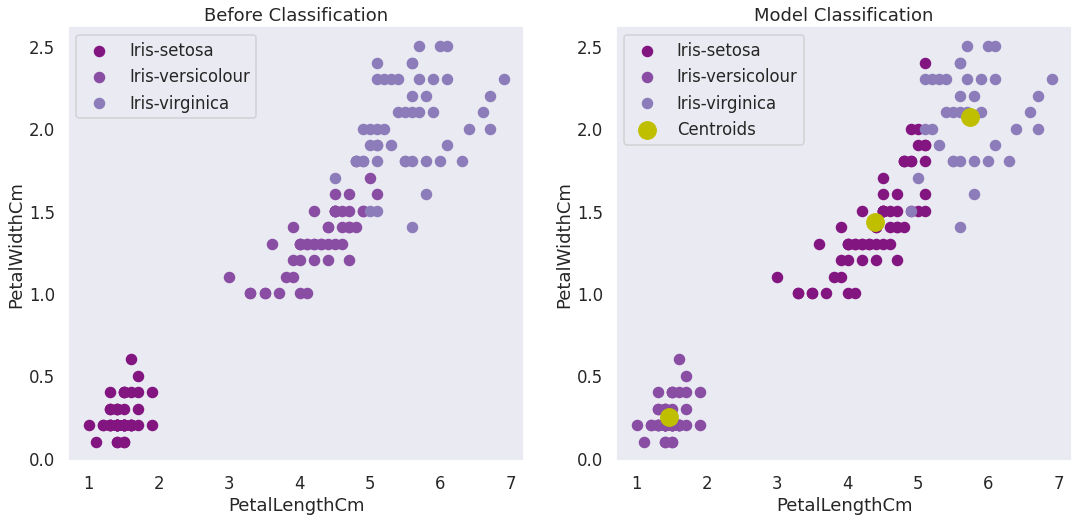

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18, 8))

ax[0].scatter(X[y == 0, 2], X[y == 0, 3], s = 100, label = 'Iris-setosa')
ax[0].scatter(X[y == 1, 2], X[y == 1, 3], s = 100, label = 'Iris-versicolour')
ax[0].scatter(X[y == 2, 2], X[y == 2, 3], s = 100, label = 'Iris-virginica')
ax[0].set(title='Before Classification')
ax[0].set_xlabel("PetalLengthCm")
ax[0].set_ylabel("PetalWidthCm")
ax[0].legend()
# Visualising clusters after fitting the model
ax[1].scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, label = 'Iris-setosa')
ax[1].scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, label = 'Iris-versicolour')
ax[1].scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300,c = 'y',label = 'Centroids')
ax[1].set_xlabel("PetalLengthCm")
ax[1].set_ylabel("PetalWidthCm")
ax[1].set(title='Model Classification')
ax[1].legend()

plt.show()



In the above graphs, we can clearly see that the red dots which represents Iris-setosa are grouped properly giving 100% accuracy. And the green and blue dots representing Iris-versicolor & Iris-virginica respectively are fairly well grouped too. Which concludes that the Petal Features differentiates the species in an optimum way as compared to the Sepal Features.

For the conclusion, we can say that with the use of 'The Elbow Method' we can identify the best value of k i.e. the number of clusters. Since we already know the target values i.e. Iris-setosa, Iris-versicolour & Iris-virginica, it was easy for us to tell that the number of clusters are supposed to be 3 but with the use of Elbow Method we justified that the ideal optimal value for k is 3.